In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
from torch.utils.data import DataLoader 
import torchvision.datasets  
import torchvision.transforms as transforms 
import timeit
import matplotlib.pyplot as plt

In [3]:
batch_size = 64
D= 784 
num_classes = 10
learning_rate = 0.001
epochs = 4


#device configuration
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = torchvision.datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [4]:
sample=iter(train_loader)
data,labels=sample.next()
print(data.shape)

torch.Size([64, 1, 28, 28])


In [5]:
class DNN(nn.Module):

    def __init__(self, input_size, hidden_size,num_classes, depth=2):
        super(DNN, self).__init__()
        self.depth = depth
        self.relu=nn.ReLU()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.bias1 = nn.BatchNorm1d(hidden_size)
        
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.bias2 = nn.BatchNorm1d(hidden_size)
        if(depth == 2):
          self.layer3 = nn.Linear(hidden_size,num_classes)
        else:
          self.layer3 = nn.Linear(hidden_size, hidden_size)
          #self.bias3 = nn.BatchNorm1d(hidden_size)
          self.layer4 = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
       
        if(self.depth == 2):
          out = self.layer3(out)
        else:
          out = self.relu(self.layer3(out))
          out = self.layer4(out)
        return out


def trainDNN(model, optimizer):
  for epoch in range(epochs):
     
      for i, (data, label) in enumerate(train_loader):
          
          #currently [100,1,28,28]
          data= data.reshape(data.shape[0], -1).to(device) 
          #now [100,784]

          label=label.to(device)

          # forward propagation
          pred_Y = model(data) 
          loss = criterion(pred_Y, label)
          
          #backward propagation
          optimizer.zero_grad()
          loss.backward() 
          optimizer.step() # updating parameters
      print("accuracy at epoch ",epoch," is ",f"{Accuracy(model):.2f}" )

def Accuracy(model):
    num_correct = 0
    num_samples = 0
    model.eval()
    with torch.no_grad():
        for data, label in test_loader:
            data = data.reshape(data.shape[0], -1).to(device)
            label=label.to(device)
            pred_Y = model(data)
            _, predictions = pred_Y.max(1) #return the index where 1 is i.e the class value
            num_correct += (predictions == label).sum()
            num_samples += predictions.size(0)

    acc=num_correct/num_samples * 100.0
    return acc

**hidden layer=2, neurons=16** <br>



In [13]:
criterion = nn.CrossEntropyLoss()

nodes=16

DNN2 = DNN(D,nodes,num_classes,2)
optimizer2 = optim.Adam(DNN2.parameters(), lr=learning_rate)
print("Accuracy with 2 hidden layers")
trainDNN(DNN2, optimizer2)
Acc0=Accuracy(DNN2)



Accuracy with 2 hidden layers
accuracy at epoch  0  is  90.31
accuracy at epoch  1  is  92.39
accuracy at epoch  2  is  92.87
accuracy at epoch  3  is  93.60


**hidden layer=2,neurons=32***

In [11]:
criterion = nn.CrossEntropyLoss()

nodes=32

DNN2 = DNN(D,nodes,num_classes,2)
optimizer2 = optim.Adam(DNN2.parameters(), lr=learning_rate)
print("Accuracy with 2 hidden layers")
trainDNN(DNN2, optimizer2)
Acc1=Accuracy(DNN2)



Accuracy with 2 hidden layers
accuracy at epoch  0  is  92.35
accuracy at epoch  1  is  94.14
accuracy at epoch  2  is  95.23
accuracy at epoch  3  is  95.59


**hidden layer=2, neuron=128**

In [12]:
criterion = nn.CrossEntropyLoss()

nodes=128

DNN2 = DNN(D,nodes,num_classes,2)
optimizer2 = optim.Adam(DNN2.parameters(), lr=learning_rate)
print("Accuracy with 2 hidden layers")
trainDNN(DNN2, optimizer2)
Acc2=Accuracy(DNN2)



Accuracy with 2 hidden layers
accuracy at epoch  0  is  95.39
accuracy at epoch  1  is  96.94
accuracy at epoch  2  is  97.00
accuracy at epoch  3  is  97.47


**hidden layer=2, neuron=512**

In [15]:
criterion = nn.CrossEntropyLoss()

nodes=512

DNN2 = DNN(D,nodes,num_classes,2)
optimizer2 = optim.Adam(DNN2.parameters(), lr=learning_rate)
print("Accuracy with 2 hidden layers")
trainDNN(DNN2, optimizer2)
Acc3=Accuracy(DNN2)



Accuracy with 2 hidden layers
accuracy at epoch  0  is  96.69
accuracy at epoch  1  is  97.86
accuracy at epoch  2  is  97.90
accuracy at epoch  3  is  97.71


**Accuracy on test data on different size of neurons with 2 hidden layer**<br>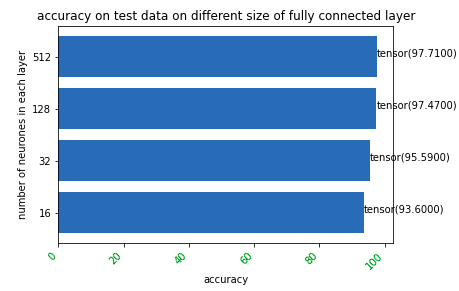
<br>
with node=16 neurones accuracy was 93% on 4 epoch which increased to 97% with 128 neurones<br>
and remain same till 512 neurones 

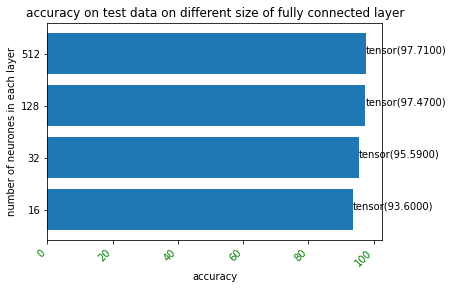

In [39]:
neurones=["16","32","128","512"]
acc=[Acc0,Acc1,Acc2,Acc3]

plt.barh(neurones, acc)
 
for index, value in enumerate(acc):
    plt.text(value, index,
             str(value))
plt.xticks(color = 'green',rotation = 45, horizontalalignment = 'right')

# fig, ax = plt.subplots()
# plt.bar(neurones, acc, color ='maroon'
#         width = 0.4)
plt.ylabel("number of neurones in each layer")
plt.xlabel("accuracy")
plt.title("accuracy on test data on different size of fully connected layer")
plt.show()

**at hidden layer=3 and neurons=512**<br>



In [10]:
start = timeit.timeit()
DNN3 = DNN(D,nodes,num_classes,3)
optimizer3 = optim.Adam(DNN3.parameters(), lr=learning_rate)

print("Accuracy with 3 hidden layers")
trainDNN(DNN3, optimizer3)



Accuracy with 3 hidden layers
accuracy at epoch  0  is  96.57
accuracy at epoch  1  is  97.36
accuracy at epoch  2  is  97.03
accuracy at epoch  3  is  97.67


We get same accuracy at both 2 layer and 3 layer in DNN with 512 nodes

In [21]:
from warnings import filterwarnings
class CNN(nn.Module):
    def __init__(self, filters,nodes,ker=3):
        super(CNN, self).__init__()
        self.relu=nn.ReLU()
        self.convL1 = nn.Conv2d(1, filters,ker)
        
        dim=(28-ker+1)
        

        self.fc1 = nn.Linear(dim*dim*filters, nodes)
        self.fc2 = nn.Linear(nodes, nodes)
        self.fc3=nn.Linear(nodes, num_classes)
        

    def forward(self, x):
        out = self.convL1(x)
        out = out.view(out.size(0), -1) # flatten the output of conv_layer1
        out= self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        
        return out

In [22]:

def trainCNN(model, optimizer):
  for epoch in range(epochs):
      print("Epoch: ",epoch)
      for i, (data, label) in enumerate(train_loader):
       
          data= data.to(device) 
          label=label.to(device)

          # forward propagation
          pred_Y = model(data) 
          loss = criterion(pred_Y, label)
          
          #backward propagation
          optimizer.zero_grad()
          loss.backward() 
          optimizer.step() # updating parameter
      print("CNN Accuracy at epoch ",epoch," is ", f"{Accuracy1(model):.2f}")

def Accuracy1(model):
    num_correct = 0
    num_samples = 0
    model.eval()
    with torch.no_grad():
        for data, label in test_loader:
            data = data.to(device)
            label=label.to(device)
            pred_Y = model(data)
            _, predictions = pred_Y.max(1) #return the index where 1 is i.e the class value
            num_correct += (predictions == label).sum()
            num_samples += predictions.size(0)

    acc=num_correct/num_samples * 100.0
    return acc

**CNN performance when number of filters =32, nodes=16,kernel size=3x3** <br>

In [25]:

epochs=4
model = CNN(32,16)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainCNN(model, optimizer)
acc0=Accuracy1(model)

Epoch:  0
CNN Accuracy at epoch  0  is  84.68
Epoch:  1
CNN Accuracy at epoch  1  is  86.17
Epoch:  2
CNN Accuracy at epoch  2  is  86.03
Epoch:  3
CNN Accuracy at epoch  3  is  86.09


**CNN performance when number of filters =32, nodes=64,kernel size=3x3** <br>

In [26]:

epochs=4
model = CNN(32,64)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainCNN(model, optimizer)
acc1=Accuracy1(model)

Epoch:  0
CNN Accuracy at epoch  0  is  94.70
Epoch:  1
CNN Accuracy at epoch  1  is  95.51
Epoch:  2
CNN Accuracy at epoch  2  is  96.21
Epoch:  3
CNN Accuracy at epoch  3  is  96.59


**CNN performance when number of filters =32, nodes=128,kernel size=3x3** <br>
for 2 epoch 4 mins


In [31]:




epochs=4
model = CNN(32,128)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainCNN(model, optimizer)
acc2=Accuracy1(model)

Epoch:  0
CNN Accuracy at epoch  0  is  94.87
Epoch:  1
CNN Accuracy at epoch  1  is  96.28
Epoch:  2
CNN Accuracy at epoch  2  is  97.17
Epoch:  3
CNN Accuracy at epoch  3  is  97.18


**CNN performance when number of filters =32, nodes=256,kernel size=3x3** <br>

In [28]:
epochs=4
model = CNN(32,256)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainCNN(model, optimizer)
acc3=Accuracy1(model)


Epoch:  0
CNN Accuracy at epoch  0  is  96.49
Epoch:  1
CNN Accuracy at epoch  1  is  97.09
Epoch:  2
CNN Accuracy at epoch  2  is  96.98
Epoch:  3
CNN Accuracy at epoch  3  is  97.10


**CNN model
<br>
accuracy on test data with different size of fully connected layer**<br>
in fully connected layer when we defined 16 nodes then we get accuracy of only 86% after 4 epoch<br> but after 64 nodes accuracy was almost the same of about 97%
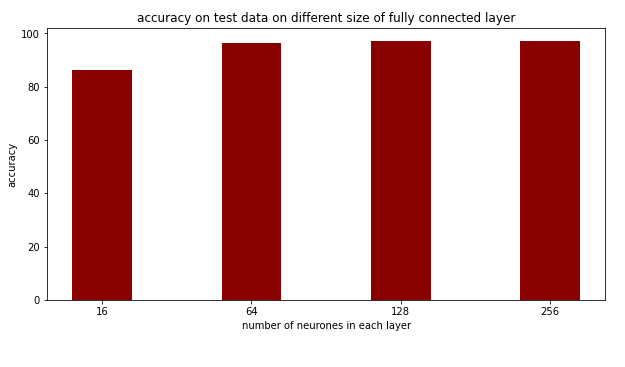

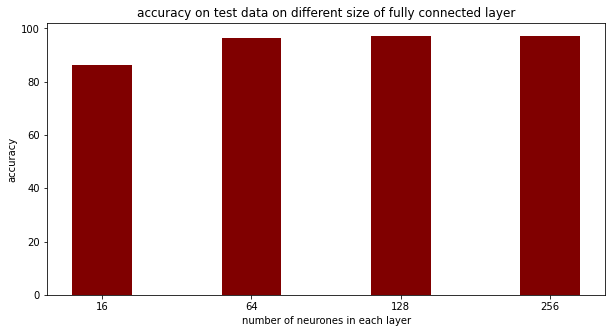

In [32]:
neurones=["16","64","128","256"]
acc=[acc0,acc1,acc2,acc3]
fig = plt.figure(figsize = (10, 5))
plt.bar(neurones, acc, color ='maroon',
        width = 0.4)
plt.xticks(color = 'green',rotation = 45, horizontalalignment = 'right')

plt.xlabel("number of neurones in each layer")
plt.ylabel("accuracy")
plt.title("accuracy on test data on different size of fully connected layer")
plt.show()

**CNN performance when number of filters =4, nodes=256,kernel size=3x3** <br>

In [40]:
epochs=4
model = CNN(4,256)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainCNN(model, optimizer)
acc00=Accuracy1(model)

Epoch:  0
CNN Accuracy at epoch  0  is  95.77
Epoch:  1
CNN Accuracy at epoch  1  is  96.47
Epoch:  2
CNN Accuracy at epoch  2  is  97.55
Epoch:  3
CNN Accuracy at epoch  3  is  97.39


**CNN performance when number of filters =64, nodes=256,kernel size=3x3** <br>

In [41]:
epochs=4
model = CNN(64,256)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainCNN(model, optimizer)
acc01=Accuracy1(model)

Epoch:  0
CNN Accuracy at epoch  0  is  95.76
Epoch:  1
CNN Accuracy at epoch  1  is  97.34
Epoch:  2
CNN Accuracy at epoch  2  is  96.87
Epoch:  3
CNN Accuracy at epoch  3  is  97.38


**CNN performance when number of filters =128, nodes=256,kernel size=3x3** <br>

In [42]:
epochs=4
model = CNN(128,256)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainCNN(model, optimizer)
acc02=Accuracy1(model)

Epoch:  0
CNN Accuracy at epoch  0  is  95.56
Epoch:  1
CNN Accuracy at epoch  1  is  96.56
Epoch:  2
CNN Accuracy at epoch  2  is  96.66
Epoch:  3
CNN Accuracy at epoch  3  is  96.85


**accuracy on test data on different number of filters with neurones=256** <br>
starting with 4 filters to 128 filters all number of filters are having same accuracy on test data of about 97%
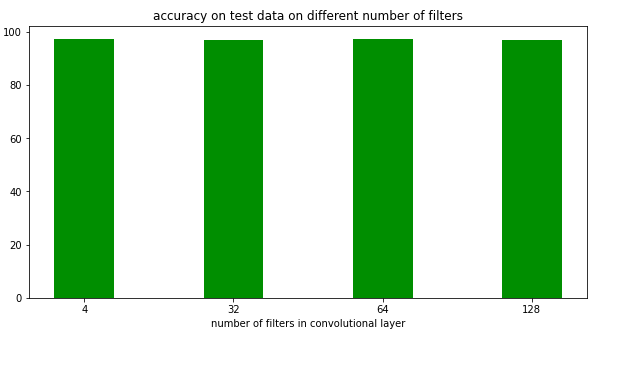

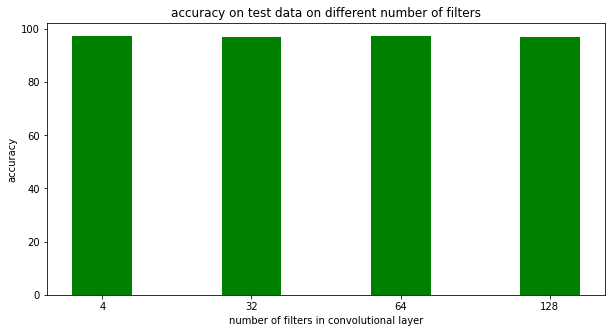

In [43]:
filters=["4","32","64","128"]
acc=[acc00,acc3,acc01,acc02]
fig = plt.figure(figsize = (10, 5))
plt.bar(filters, acc, color ='green',
        width = 0.4)
plt.xlabel("number of filters in convolutional layer")
plt.ylabel("accuracy")
plt.title("accuracy on test data on different number of filters")
plt.show()